Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [31]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [33]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [35]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [37]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [40]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [42]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [44]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

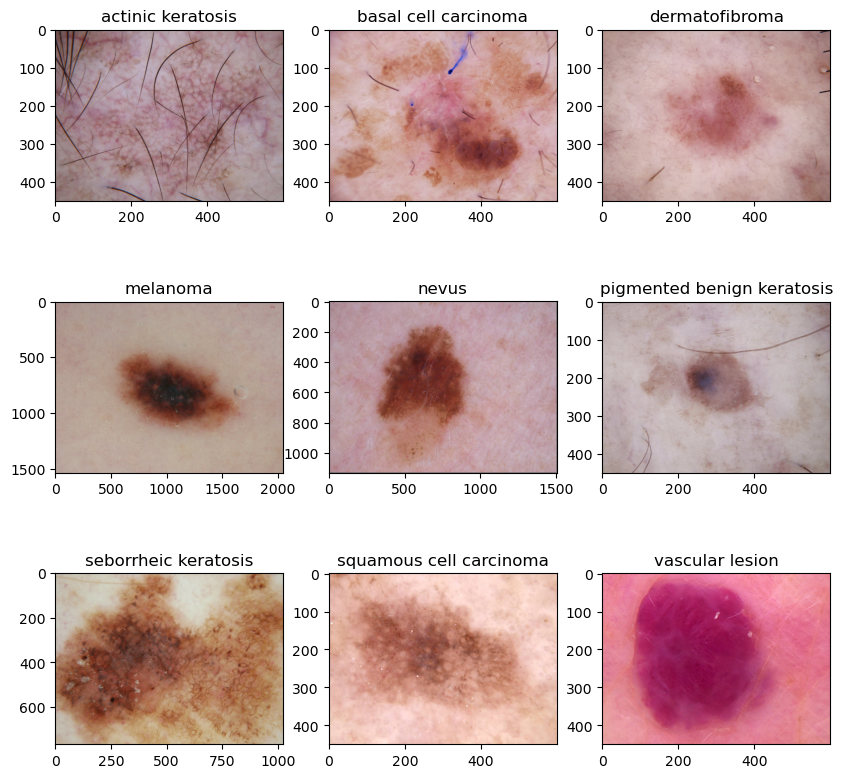

In [48]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [50]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [58]:
### Your code goes here
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling

num_classes = 9
img_height, img_width = 180, 180

model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3))  # Input shape is defined here
])

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(num_classes, activation="softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [62]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [64]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │          69,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,129 (1.06 MB)

 Trainable params: 277,129 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [66]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\shrav\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.1808 - loss: 2.1040 - val_accuracy: 0.1924 - val_loss: 2.0344
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 56s 999ms/step - accuracy: 0.1897 - loss: 2.0057 - val_accuracy: 0.2058 - val_loss: 2.0266
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 55s 977ms/step - accuracy: 0.2186 - loss: 2.0159 - val_accuracy: 0.2103 - val_loss: 2.0249
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 963ms/step - accuracy: 0.1899 - loss: 2.0736 - val_accuracy: 0.2058 - val_loss: 2.0250
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 56s 996ms/step - accuracy: 0.2203 - loss: 2.0003 - val_accuracy: 0.1924 - val_loss: 2.0238
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.2073 - loss: 2.0166 - val_accuracy: 0.2058 - val_loss: 2.0318
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.2135 - loss: 2.0065 - val_accuracy: 0.2058 - val_loss: 2.0565
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.1834 - loss: 2.0172 - val_accuracy: 0.2058 - val_loss

### Visualizing training results

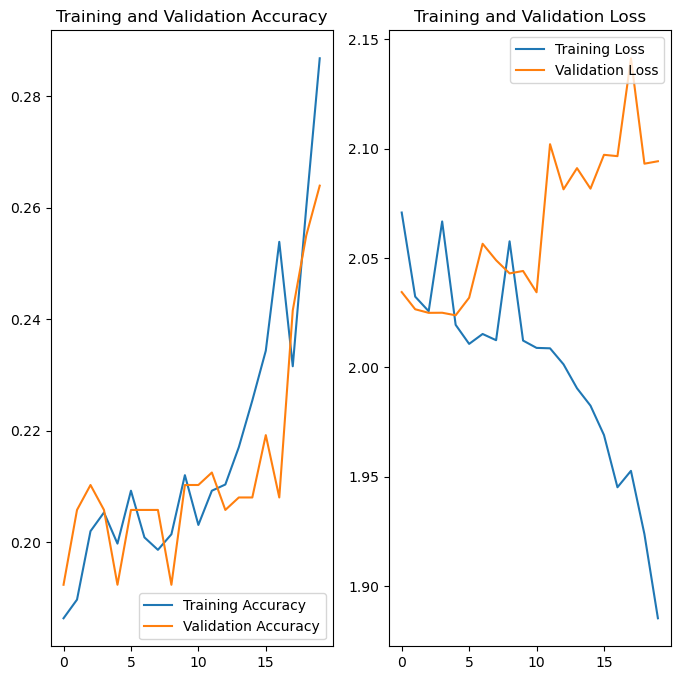

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [72]:
#!pip install --upgrade tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB 960.0 kB/s eta 0:06:32
   ---------------------------------------- 1.5/376.0 MB 19.3 MB/s eta 0:00:20
   ---------------------------------------- 4.1/376.0 MB 32.6 MB/s eta 0:00:12
    --------------------------------------- 6.5/376.0 MB 37.8 MB/s eta 0:00:10
    --------------------------------------- 9.2/376.0 MB 41.8 MB/s eta 0:00:09
   - -------------------------------------- 12.0/376.0 MB 59.5 MB/s eta 0:00:07
   - -------------------------------------- 14.8/376.0 MB 59.5 MB/s eta 0:00:07
   - -------------------------------------- 17.4/376.0 MB 59.5 MB/s eta 0:00:07
   -- ------------------------------------- 19.9/376.0 MB 59.5 MB/s eta 0:00:06
   -- ------------------------------------- 22.2/376.0 MB 59.5 MB/s eta 0:00:06
   -- ------------------------------------- 25.3/376.0 MB 59.8 MB/s eta 0:00:06
   -- ------------------------------------- 28.1/376.

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shrav\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [73]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [82]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
from keras import Sequential
from keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augument = Sequential([
    RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    RandomRotation(0.2, fill_mode='reflect'),
    RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


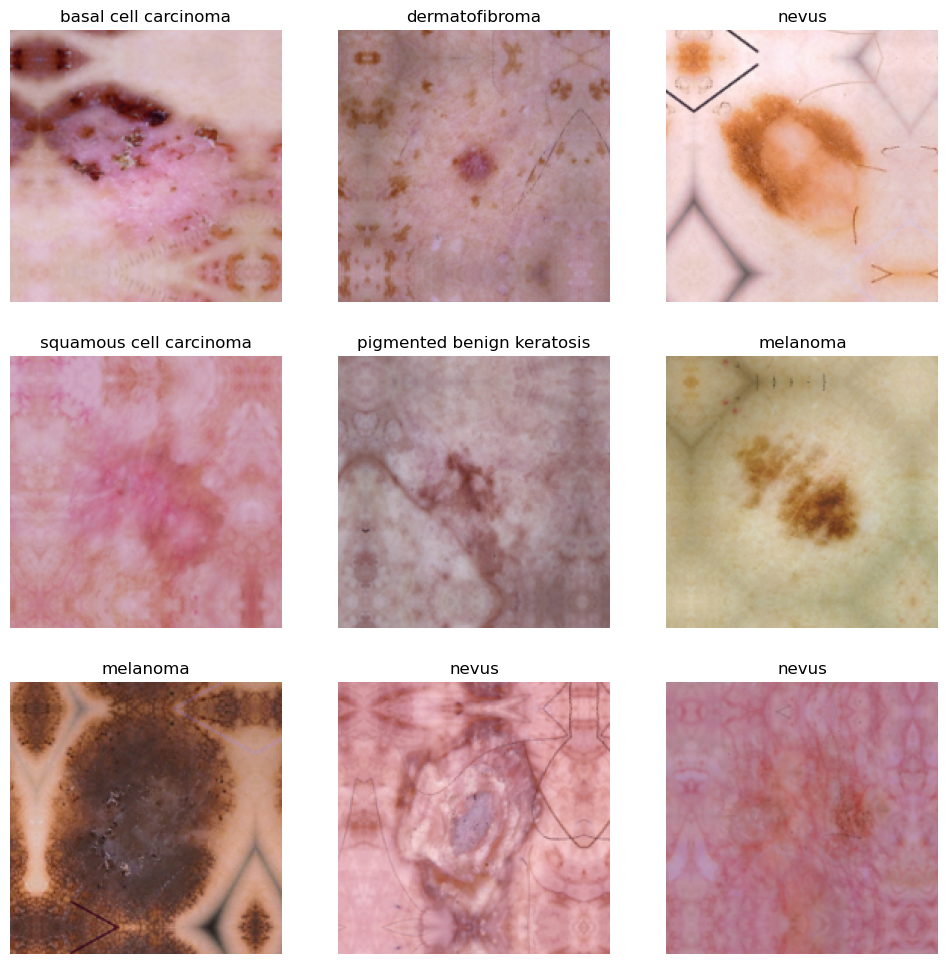

In [84]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [106]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes her## You can use Dropout layer if there is an evidence of overfitting in your findings
try:
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Rescaling, RandomFlip, RandomRotation, RandomZoom

    num_classes = 9
    img_height, img_width = 180, 180

    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
        RandomRotation(0.2, fill_mode='reflect'),
        RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
    ])

    # Model definition
    model = Sequential([
        data_augmentation,
        Rescaling(1./255)
    ])

    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(num_classes, activation="softmax"))

except Exception as e:
    print(f"An error occurred: {e}")
    e



### Compiling the model

In [108]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [110]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.1835 - loss: 2.0825 - val_accuracy: 0.1924 - val_loss: 2.0352
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.2388 - loss: 1.9958 - val_accuracy: 0.3468 - val_loss: 1.8510
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.2524 - loss: 1.9619 - val_accuracy: 0.3043 - val_loss: 1.8598
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.3337 - loss: 1.7977 - val_accuracy: 0.3647 - val_loss: 1.7764
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.3431 - loss: 1.7766 - val_accuracy: 0.2998 - val_loss: 1.8631
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.3446 - loss: 1.7511 - val_accuracy: 0.4139 - val_loss: 1.5889
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.4166 - loss: 1.6057 - val_accuracy: 0.4273 - val_loss: 1.6065
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.4073 - loss: 1.5881 - val_accuracy: 0.4072 - val_loss:

### Visualizing the results

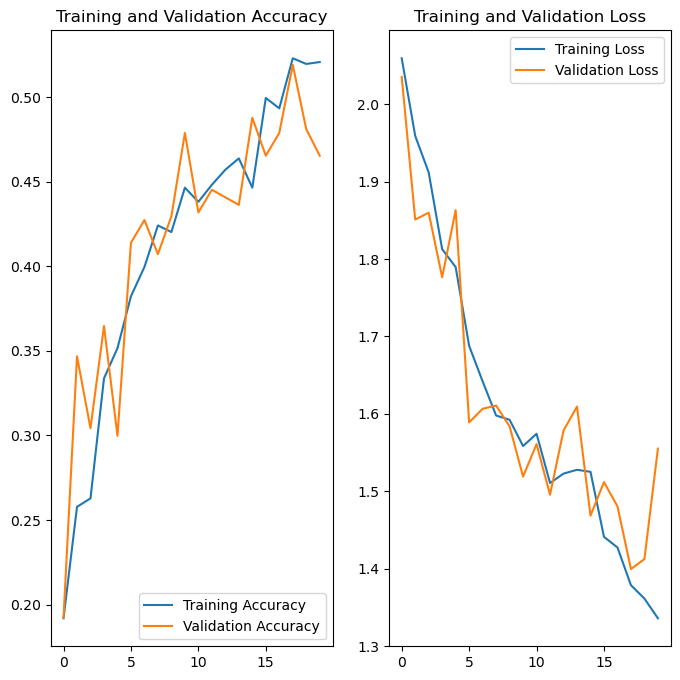

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Finding from Second Model
-
There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentati
- We can increase the epochs to increase the accuracy so it's too early for judgement
ment

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [115]:
## Your code goes here.
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


In [127]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


<BarContainer object of 9 artists>

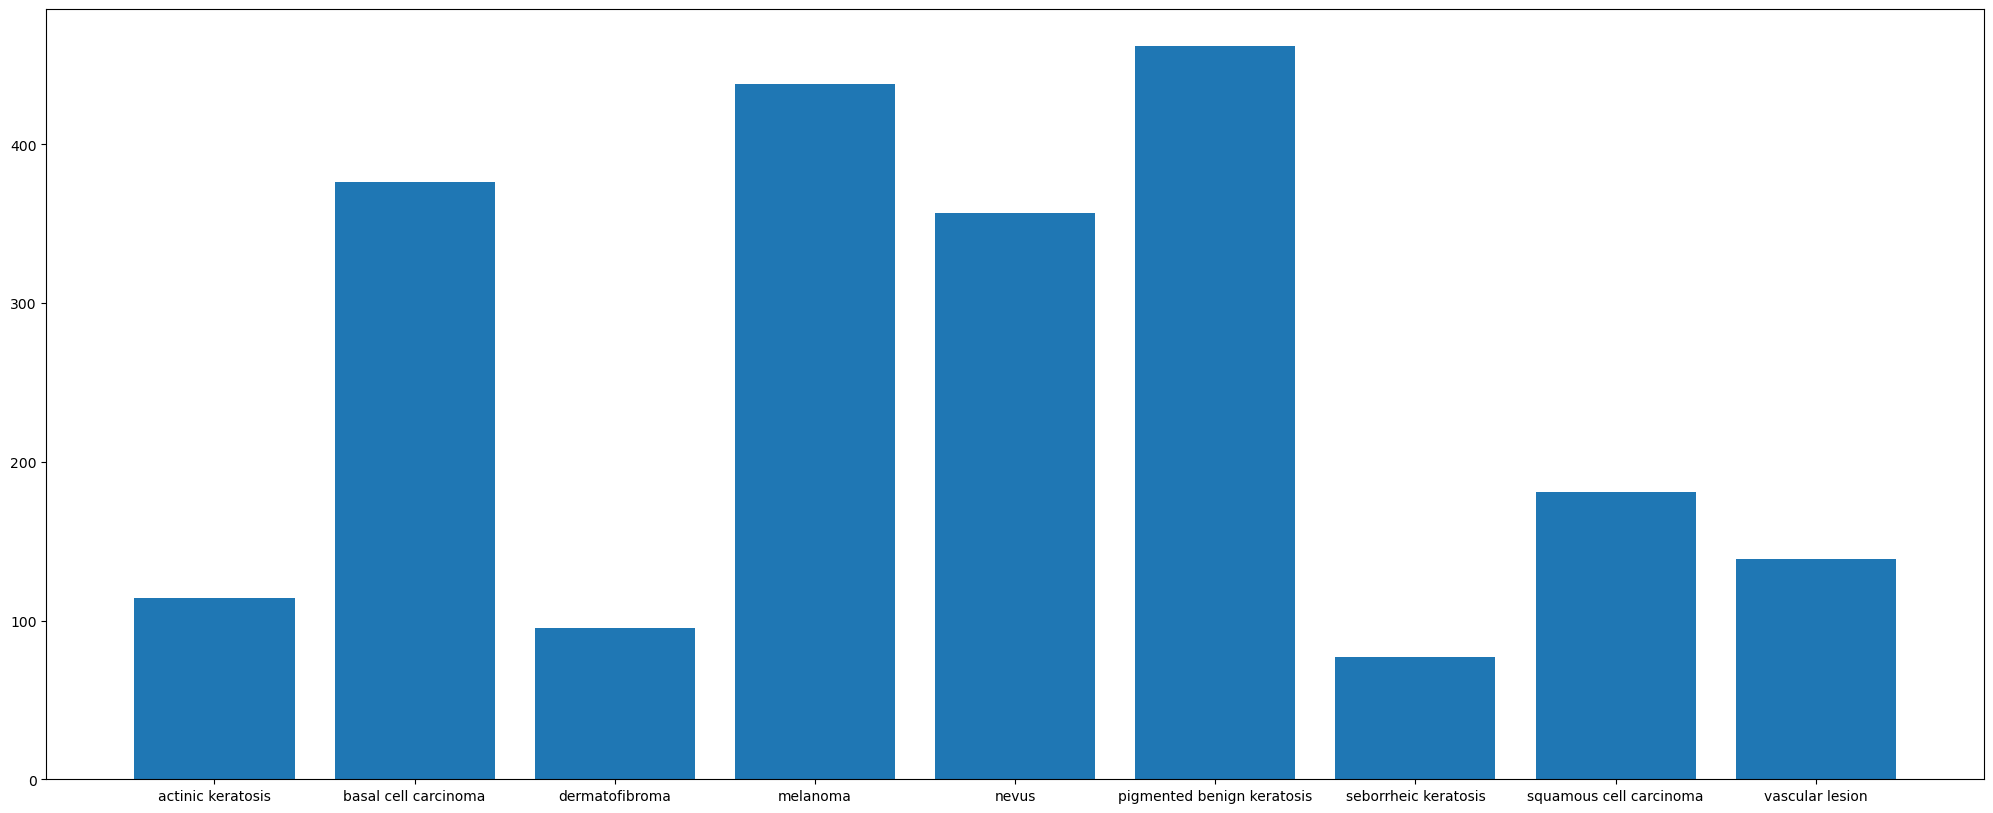

In [129]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### Ans: squamous cell carcinoma has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
#### Ans: actinic keratosis and dermatofibroma have proportionate number of classes.
melanoma and pigmented benign keratosis have proprtionate number of classes

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [132]:
#!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [174]:
import os
print(os.path.exists("Skin cancer ISIC The International Skin Imaging Collaboration/Train"))

True


In [190]:
#path_to_training_dataset="To do"
import os
import Augmentor

# Define the path to your training dataset
base_path = "Skin cancer ISIC The International Skin Imaging Collaboration/Train"  # Update this path as needed

# Dynamically retrieve class names (subfolder names in the 'Train' directory)
class_names = os.listdir(base_path)

# Loop through each class folder to augment images
for class_name in class_names:
    # Construct the full path for the class folder
    class_path = os.path.join(base_path, class_name)
    
    # Check if the class folder exists and contains files
    if os.path.exists(class_path) and len(os.listdir(class_path)) > 0:
        print(f"Processing class: {class_name}")
        
        # Initialize Augmentor pipeline for the specific class
        p = Augmentor.Pipeline(class_path, save_format='jpg')
        
        # Add augmentation operations
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)  # Random rotation
        p.flip_left_right(probability=0.5)  # Horizontal flip
        p.zoom_random(probability=0.5, percentage_area=0.8)  # Random zoom
        
        # Sample 500 augmented images for this class
        try:
            p.sample(500)
        except Exception as e:
            print(f"An error occurred while processing {class_name}: {e}")
    else:
        print(f"Skipping class: {class_name}. No images found.")



Processing class: actinic keratosis
Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21F4363D5B0>: 100%|██████████████████████████████████| 500/500 [00:03<00:00, 135.68 Samples/s]


Processing class: basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\basal cell carcinoma\output.

Executing Pipeline:   0%|                                                                                                    | 0/500 [00:00<?, ? Samples/s]


An error occurred while processing basal cell carcinoma: 'FileNotFoundError' object has no attribute 'message'
Processing class: dermatofibroma
Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21F48D65040>: 100%|██████████████████████████████████| 500/500 [00:03<00:00, 133.27 Samples/s]


Processing class: melanoma
Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x21F38124AD0>: 100%|██████████████████████████████████| 500/500 [00:18<00:00, 26.82 Samples/s]


Processing class: nevus
Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x21F4CC7D1F0>: 100%|███████████████████████████████████| 500/500 [00:20<00:00, 23.94 Samples/s]


Processing class: output
Initialised with 121 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\output\output.

Executing Pipeline:   0%|                                                                                                    | 0/500 [00:01<?, ? Samples/s]


An error occurred while processing output: 'FileNotFoundError' object has no attribute 'message'
Processing class: pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\pigmented benign keratosis\output.

Executing Pipeline:   0%|                                                                                                    | 0/500 [00:00<?, ? Samples/s]


An error occurred while processing pigmented benign keratosis: 'FileNotFoundError' object has no attribute 'message'
Processing class: seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\seborrheic keratosis\output.

Executing Pipeline:   0%|                                                                                                    | 0/500 [00:00<?, ? Samples/s]


An error occurred while processing seborrheic keratosis: 'FileNotFoundError' object has no attribute 'message'
Processing class: squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\squamous cell carcinoma\output.

Executing Pipeline:   0%|                                                                                                    | 0/500 [00:00<?, ? Samples/s]


An error occurred while processing squamous cell carcinoma: 'FileNotFoundError' object has no attribute 'message'
Processing class: vascular lesion
Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x21F6C6B59D0>: 100%|██████████████████████████████████| 500/500 [00:03<00:00, 130.12 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [192]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

2500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [242]:
import pathlib
data_dir_train1 = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/melanoma").resolve()
print(data_dir_train1)  # Check if the path is correct
image_count_train1 = len(list(data_dir_train1.glob('*.jpg')))
print(image_count_train1)


C:\Users\shrav\Workspace_Upgrade_2024\Melanoma-Detection-Assignment-Case-Study\Skin cancer ISIC The International Skin Imaging Collaboration\Train\output\melanoma
42


In [246]:
import os
from glob import glob
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [252]:
from glob import glob
import os

# Assume data_dir_train points to the base directory containing your class folders
data_dir_train = "Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# Collect file paths
path_list_new = glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))


In [270]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [296]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
print(new_df)

                                                   Path              Label
0     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
1     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
2     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
3     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
4     Skin cancer ISIC The International Skin Imagin...  actinic keratosis
...                                                 ...                ...
2234  Skin cancer ISIC The International Skin Imagin...    vascular lesion
2235  Skin cancer ISIC The International Skin Imagin...    vascular lesion
2236  Skin cancer ISIC The International Skin Imagin...    vascular lesion
2237  Skin cancer ISIC The International Skin Imagin...    vascular lesion
2238  Skin cancer ISIC The International Skin Imagin...    vascular lesion

[2239 rows x 2 columns]


In [298]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [300]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [318]:
import pathlib
data_dir_train1=pathlib.Path("Melanoma-Detection-Assignment-Case-Study/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [320]:
data_dir_train1

WindowsPath('Melanoma-Detection-Assignment-Case-Study/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [334]:
import os
print(os.getcwd())  # Prints the current working directory


C:\Users\shrav\Workspace_Upgrade_2024\Melanoma-Detection-Assignment-Case-Study


In [336]:
from pathlib import Path

# Use relative path
data_dir_train1 = Path("C:/Users/shrav/Workspace_Upgrade_2024/Melanoma-Detection-Assignment-Case-Study")

# Check if path exists
if data_dir_train1.exists():
    print("Directory exists!")
    print(list(data_dir_train1.iterdir()))  # List files and folders
else:
    print("Directory does not exist:", data_dir_train1)


Directory exists!
[WindowsPath('C:/Users/shrav/Workspace_Upgrade_2024/Melanoma-Detection-Assignment-Case-Study/.git'), WindowsPath('C:/Users/shrav/Workspace_Upgrade_2024/Melanoma-Detection-Assignment-Case-Study/.ipynb_checkpoints'), WindowsPath('C:/Users/shrav/Workspace_Upgrade_2024/Melanoma-Detection-Assignment-Case-Study/README.md'), WindowsPath('C:/Users/shrav/Workspace_Upgrade_2024/Melanoma-Detection-Assignment-Case-Study/Skin cancer ISIC The International Skin Imaging Collaboration'), WindowsPath('C:/Users/shrav/Workspace_Upgrade_2024/Melanoma-Detection-Assignment-Case-Study/Starter_code_Assignment_CNN_Skin_Cancer.ipynb')]


In [356]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("C:/Users/shrav/Workspace_Upgrade_2024/Melanoma-Detection-Assignment-Case-Study/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4860 files belonging to 10 classes.
Using 3888 files for training.


#### **Todo:** Create a validation dataset

In [358]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4860 files belonging to 10 classes.
Using 972 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [362]:
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import Rescaling

# Define model parameters
num_classes = 9
img_height = 180  # Replace with your image height
img_width = 180   # Replace with your image width

# Build the model
model = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3))  # Corrected Rescaling layer
])

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', 
                 activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Use Dropout for regularization

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))  # Final output layer

# Summary of the model
model.summary()


C:\Users\shrav\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 90, 90, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 45, 45, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 9)                   │         278,793 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460,585 (1.76 MB)

 Trainable params: 460,585 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [364]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [376]:
all_labels = []
for _, labels in train_ds:
    all_labels.extend(labels.numpy())
print(f"Unique labels in train_ds: {set(all_labels)}")


Unique labels in train_ds: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [378]:
num_classes = max(all_labels) + 1

In [380]:
model.add(Dense(num_classes, activation="softmax"))

In [386]:
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, Rescaling

# Define the model
model = Sequential([
    Input(shape=(img_height, img_width, 3)),  # Explicit Input layer
    Rescaling(1.0 / 255)                      # Normalization layer
])

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Summarize the model
model.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 180, 180, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 180, 180, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 90, 90, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 45, 45, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │         309,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 491,562 (1.88 MB)

 Trainable params: 491,562 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [390]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [392]:
epochs = 50

history = model.fit(
    train_ds,                  # Training dataset
    validation_data=val_ds,    # Validation dataset
    epochs=epochs              # Number of epochs
)


Epoch 1/50


C:\Users\shrav\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


122/122 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.2292 - loss: 2.0459 - val_accuracy: 0.3899 - val_loss: 1.7590
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.3977 - loss: 1.6725 - val_accuracy: 0.4794 - val_loss: 1.4742
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.4676 - loss: 1.5129 - val_accuracy: 0.4444 - val_loss: 1.7445
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.5173 - loss: 1.4186 - val_accuracy: 0.5134 - val_loss: 1.3807
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.5446 - loss: 1.3014 - val_accuracy: 0.5257 - val_loss: 1.3827
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.5508 - loss: 1.2750 - val_accuracy: 0.5370 - val_loss: 1.3552
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.5735 - loss: 1.2068 - val_accuracy: 0.5566 - val_loss: 1.4901
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6007 - loss: 1.1668 - val_accuracy: 0.542

#### **Todo:**  Visualize the model results

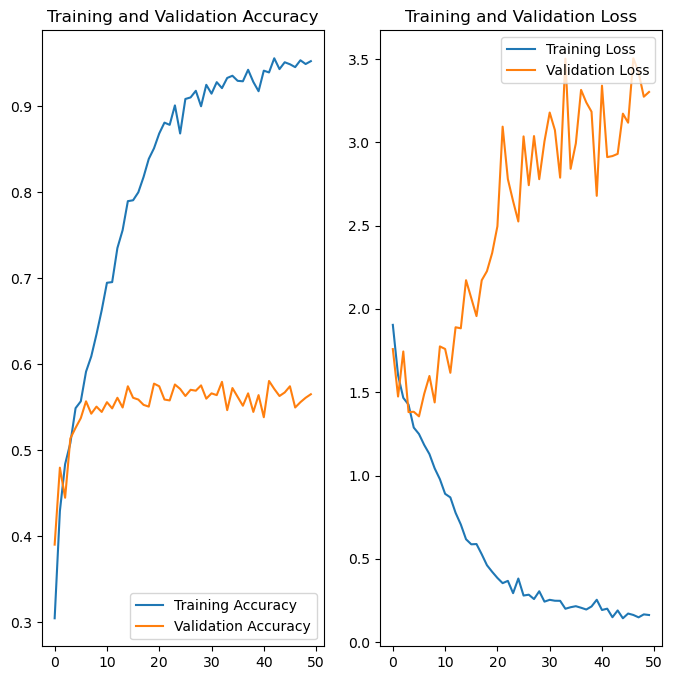

In [395]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- Accuracy on training data has increased by using Augmentor library
- 
Model is still overfitting  - 

The problem of overfitting can be solved by add more layer,neurons or adding dropout layer  - s.

The Model can be further improved by tuning the hyperparameter